# CNN   small datasets 학습


- 학습할 Data의 개수가 많지 않을 때 CNN을 통한 모형 학습이 어려울 수 있음
  - 딥러닝은 많은 양의 데이터셋을 이용해 feature engineering 과정 없이 원하는 문제를 해결할 수 있다. => **Point: 많은 데이터 양**
- Data 양이 많지 않아 딥러닝 모델의 학습에 어려움이 있을 때 사용 가능한 방법
    - **Image augmentation 활용**
        - Image에 다양한 효과를 주어 데이터양을 늘린다.
            - Train dataset은 전체 대상 이미지들을 샘플링한 것이기 때문에 모든 형태를 다 가지고 있지 않다. Data augmentation은 train set의 이미지에 다양한 효과를 주어 실제 데이터셋과의 간격을 줄인다.
            - 영상데이터의 경우 각 영상 데이터의 색변경, 이미지잘라내기, 회전시키기, 명암변경 등을 적용하여 이미지들을 추가로 만들어 data의 수를 늘린다.
        - **모델의 Overfitting을 개선시킨다.**
        - pytorch image augmentation을 위한 클래스들
            - https://pytorch.org/vision/stable/transforms.html
    - **Pre-trained network**의 활용한 **Transfer learning (전이학습)**
        - 매우 큰 데이터셋으로 미리 Training한 모델을 이용해 모델을 정의한다.
        - 성능이 좋은모델을 다량의 데이터로 학습시킨 모델을 사용하므로 적은 데이터에도 좋은 성능을 낼 수있다.

# Image Augmentation 예제

In [1]:
import torch
from torchvision import transforms

import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('test_img/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

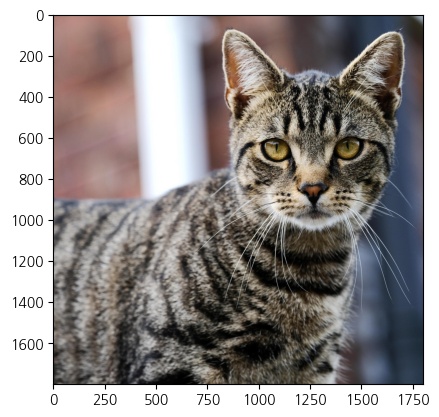

In [5]:
plt.imshow(img)

In [7]:
# 이미지 출력 함수
def image_show(img_path, transforms):
    """
    이미지 경로와 transforms를 받아서 적용한뒤 원본이미지와 처리된 이미지를 출력한다.
    transforms는 8번 적용시켜 출력한다.
    [parameter]
        img_path: str - transforms를 적용할 이미지 경로
        transforms: Transforms 객체. 단 ToTensor()가 첫번째 transforms로 정의되 있어야 한다.
    """
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.rcParams['font.family'] = 'gulim'

    plt.figure(figsize=(15, 12))
    plt.subplot(3, 3, 1)
    plt.imshow(img)
    plt.title('원본')

    for i in range(2, 10):
        result_img = transforms (img)
        plt.subplot(3, 3, i)    
        plt.imshow(result_img.permute(1, 2, 0))

    plt.tight_layout()
    plt.show()

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


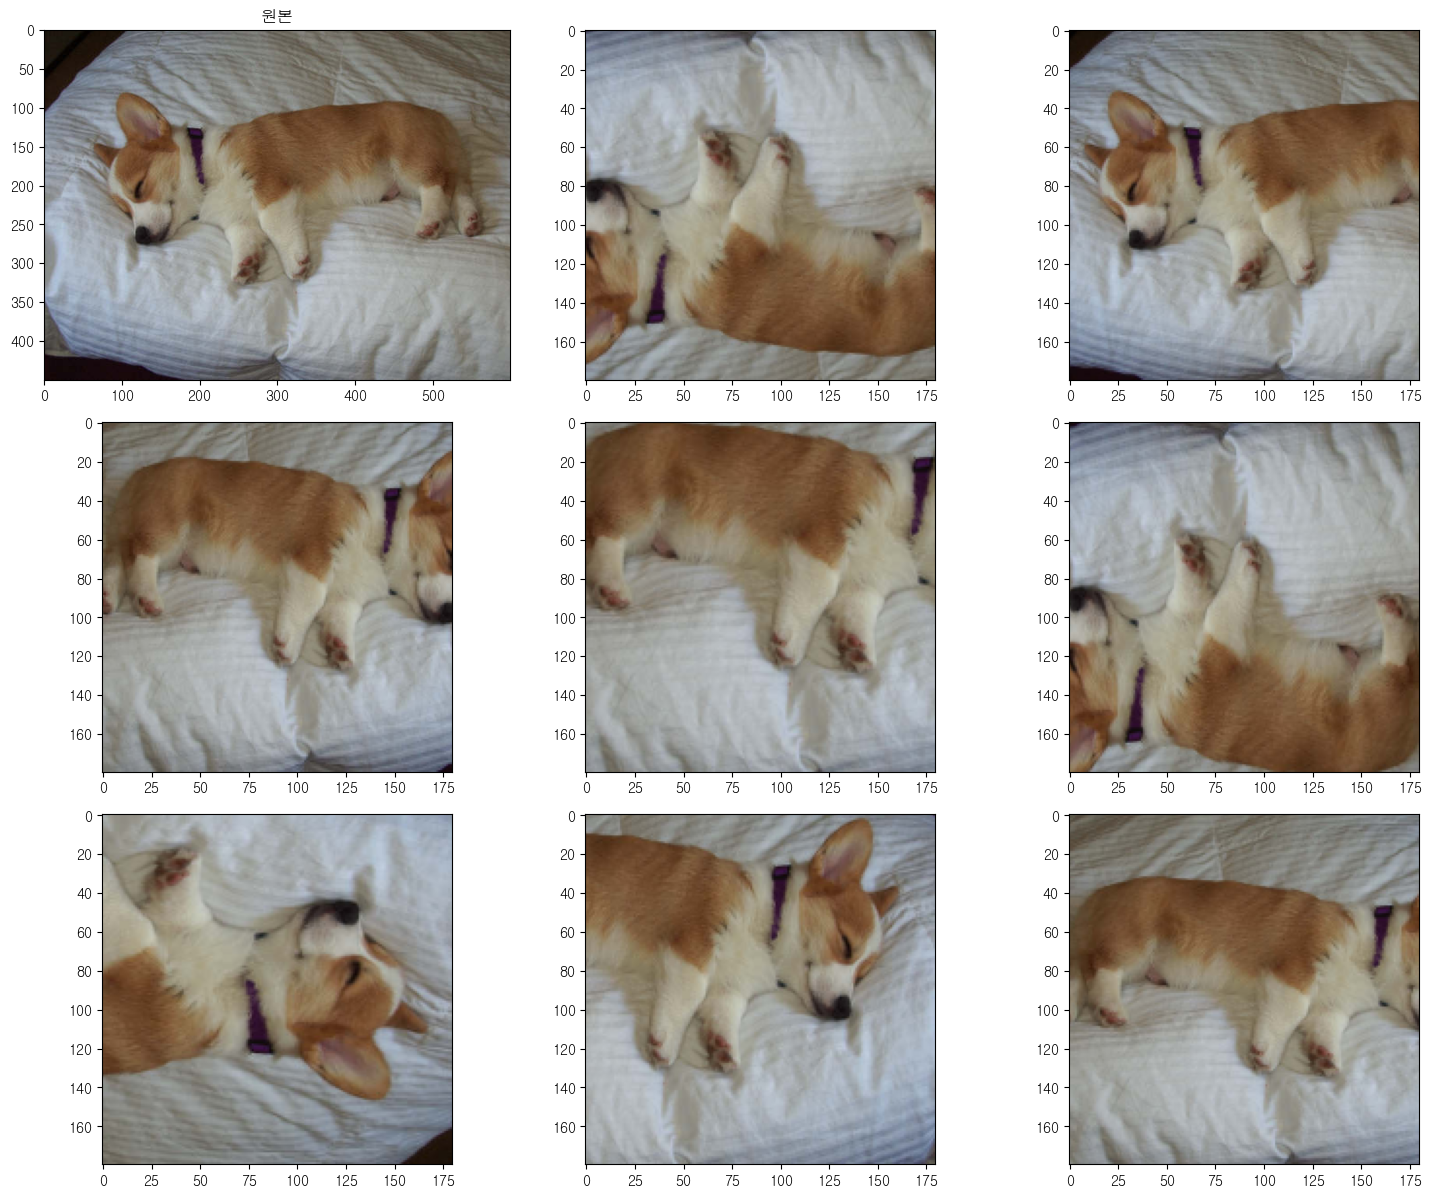

In [19]:

transform = transforms.Compose([ # 순서대로 적용시켜주는 애다 Compose는 
    transforms.ToTensor()
    ###########################
    # 좌우/상하 반전. 
    ###########################
    , transforms.RandomHorizontalFlip(p=0.5) # 50퍼 확률로 적용시킴 ->다양한 Data를 위해서 
    , transforms.RandomVerticalFlip(p=0.5)  
    
    ###########################
    # 회전
    ###########################
#     , transforms.RandomRotation(degrees=180)
    
    ###########################
    # affine 이동 변환들
    #  회전, 이동, 전단 변환 처리
    ###########################
#     , transforms.RandomAffine(degrees=(0,0),
#                               translate=(0.1,0.3), # 이동
#                               shear=(0.8, 5.2),    # 전단변환
#                               scale=(0.5,1.2),     # 변환후 크기 조정
#                              )
    
    ###########################
    # 가우시안 블러
    ###########################
#     , transforms.GaussianBlur(kernel_size=(17,17), sigma=(1, 5))
    # sigma: 표준편차
    # kernel size, sigma는 클수록 블러가 심해진다
    
    ########################### 
    # 선명도 (Sharpen)
    ###########################
#     , transforms.RandomAdjustSharpness(sharpness_factor=5, p=0.5) 
        # sharpness_factor: 1 원본과 동일 1 미만 - blur , 1초과 : sharpning
    ###########################
    # 색관련 변환
    #  밝기, 대비, 채도, 색 변환 처리
    ###########################
#     , transforms.ColorJitter(brightness=(0.5, 1.2),  #  밝기 조절
#                            contrast=(0.8, 1.2),      #  대비 조절
#                            saturation=(0.5, 1.5),    #  채도 조절
#                            hue=(-0.2, 0.2))          # 색 변환 
    
    #########################
    # Grayscale
    #########################
#     , transforms.RandomGrayscale(p=0.25)
    
    ############################
    # 반전 - 확률 지정할 수 있다.
    ############################
#     , transforms.RandomInvert(p=0.7)
    
    
    ###########################
    # Center 영역 Crop
    ###########################
#     , transforms.CenterCrop(150) # 가운데 잘라서 영역 뽑아오기, # 크롭할 사이즈. 정수 - 150 (150,150)
    
    ############################
    # RandomCrop - Crop 영역을 random하게 선택한다.
    ############################
#     , transforms.RandomCrop(150) # 영역을 랜덤으로 뽑아오기

    ###########################
    # RandomResizedCrop - Random한 영역을 Crop후 지정한 종횡비 resize 한다.
    ###########################
    , transforms.RandomResizedCrop(180,         # 랜덤으로 크롭하고 사이즈 지정하기
                                   scale=(0.3, 0.7),  # 크롭후 resize 할 비율 범위
                                   ratio=(0.5, 1.5)   # 종횡비(가로,세로의비율. <-가로기준 세로의 비율)
                                  )
    ##############################
    # 이미지를 부분적으로 삭제한다. (픽셀값을 0으로 변경)
    # p=확률, scale=() 삭제 크기범위, ratio=() 삭제 종횡비 범위 => 지정된 튜플 비율에서 random 하게 선택되 변경됨
    # occlusion(폐색-가려지는 문제)문제에서의 한계를 해결. https://deepapple.tistory.com/8
    ###############################
#     , transforms.RandomErasing() # 랜덤으로 가려지기 

])

img_path = 'test_img/image.jpg'
image_show(img_path, transform)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


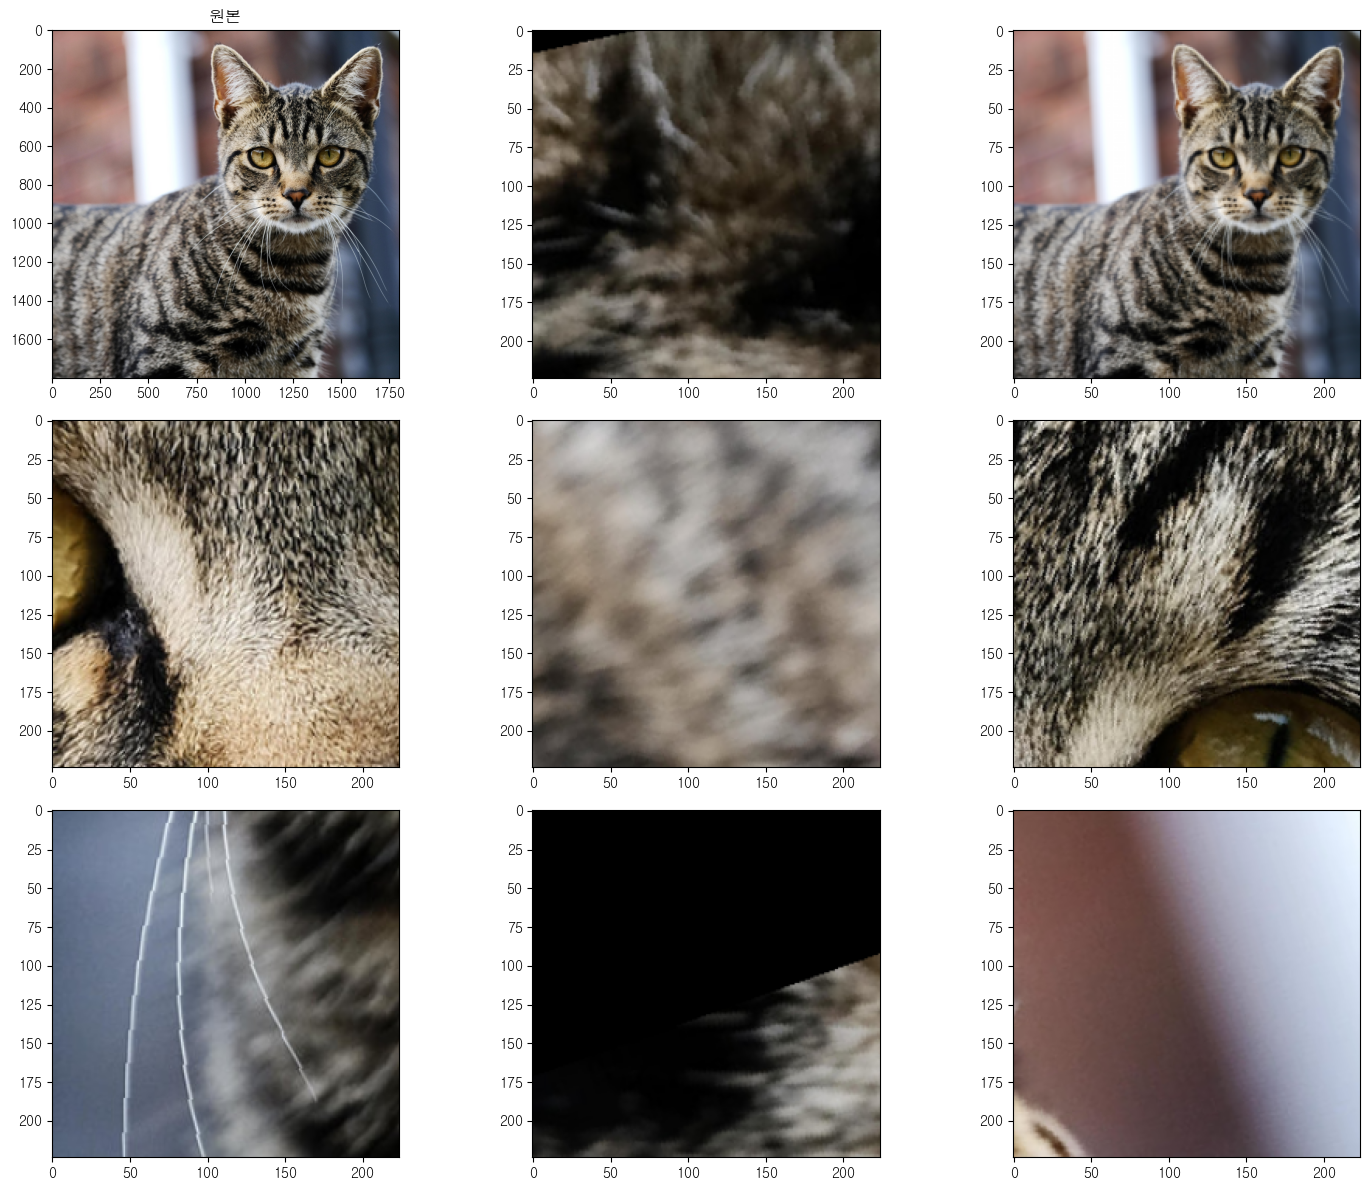

In [20]:

#####################################
# RandomApply() - 여러개 중 Random하게 여러개를 선택해서 적용한다. 선택 확률을 선택할 수 있다.
# RandomChoice() - 여러개 중 하나를 적용한다.
#####################################
transform2 = transforms.Compose([
    transforms.ToTensor()
    , transforms.RandomApply([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(45), 
        transforms.RandomCrop((200,200)),
    ], p = 0.9)
    , transforms.Resize((224, 224), antialias=True)
])

# transform2 = transforms.Compose([
#     transforms.ToTensor()
#     , transforms.RandomChoice([
#         transforms.RandomRotation(45), 
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip(),
#     ])
#     , transforms.Resize((224, 224), antialias=True)
# ])

image_show('test_img/cat.jpg', transform2)